In [2]:
import pandas as pd
df = pd.read_csv('synthetic_healthcare_data.csv')
print(df.head())
print(df.info())
print(df.describe())

  patient_id  age  gender   bmi smoking_status  blood_pressure  \
0      P0001   62  Female  15.2     Non-smoker             115   
1      P0002   65    Male  31.3     Non-smoker             134   
2      P0003   82    Male  15.8     Non-smoker             150   
3      P0004   85  Female  29.0         Smoker             144   
4      P0005   85  Female  33.1         Smoker             152   

   cholesterol_level diabetes heart_disease  visit_date  
0                278       No           Yes  2022-06-08  
1                273       No            No  2022-10-12  
2                199       No            No  2023-12-25  
3                280      Yes            No  2023-03-27  
4                281       No            No  2024-12-23  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         500 non-null    object 
 1   a

In [3]:
print(df.isnull().sum())

patient_id           0
age                  0
gender               0
bmi                  0
smoking_status       0
blood_pressure       0
cholesterol_level    0
diabetes             0
heart_disease        0
visit_date           0
dtype: int64


In [4]:
print(df['gender'].value_counts())
print(df['smoking_status'].value_counts())
print(df['diabetes'].value_counts())
print(df['heart_disease'].value_counts())

gender
Male      258
Female    242
Name: count, dtype: int64
smoking_status
Non-smoker    356
Smoker        144
Name: count, dtype: int64
diabetes
No     394
Yes    106
Name: count, dtype: int64
heart_disease
No     425
Yes     75
Name: count, dtype: int64


In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.isnull().sum())
df = df.dropna()

patient_id           0
age                  0
gender               0
bmi                  0
smoking_status       0
blood_pressure       0
cholesterol_level    0
diabetes             0
heart_disease        0
visit_date           0
dtype: int64


In [6]:
df['visit_date'] = pd.to_datetime(df['visit_date'])
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates: 0


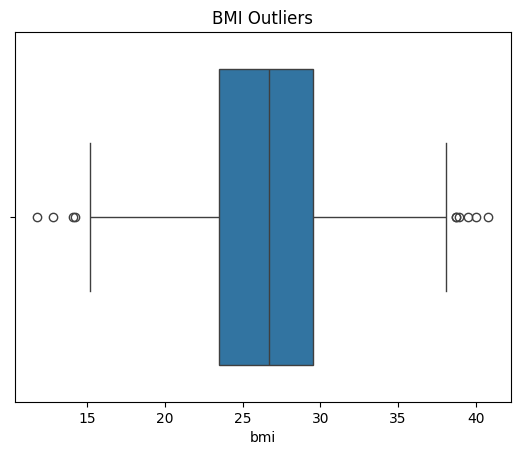

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['bmi'])
plt.title("BMI Outliers")
plt.show()

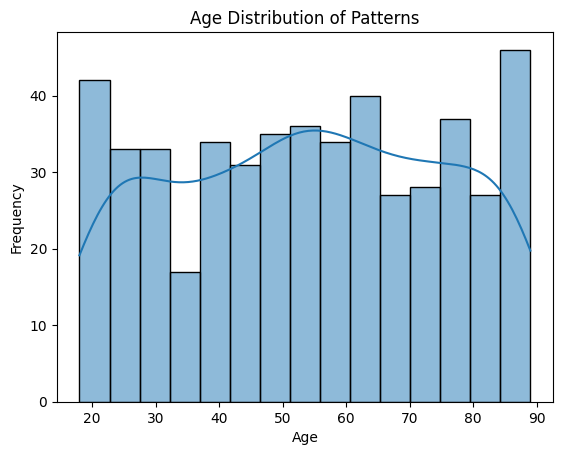

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['age'], bins=15, kde=True)
plt.title("Age Distribution of Patterns")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

diabetes
No     394
Yes    106
Name: count, dtype: int64
heart_disease
No     425
Yes     75
Name: count, dtype: int64


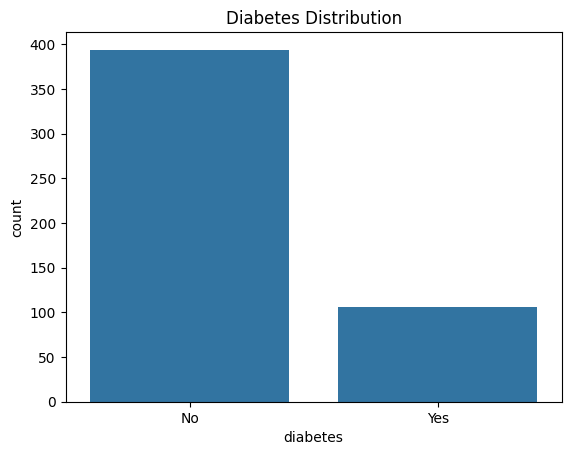

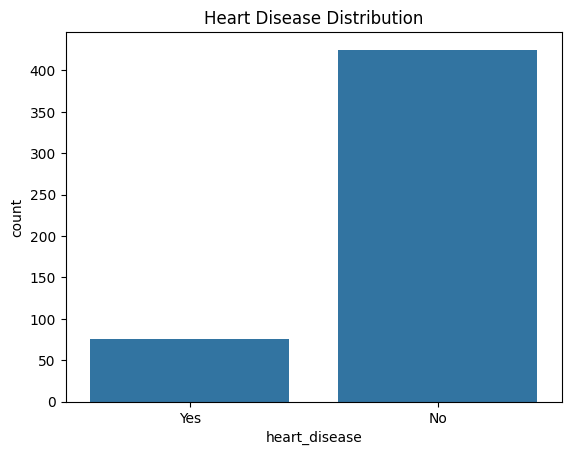

In [12]:
print(df['diabetes'].value_counts())
print(df['heart_disease'].value_counts())

sns.countplot(x='diabetes', data=df)
plt.title("Diabetes Distribution")
plt.show()

sns.countplot(x='heart_disease', data=df)
plt.title("Heart Disease Distribution")
plt.show()

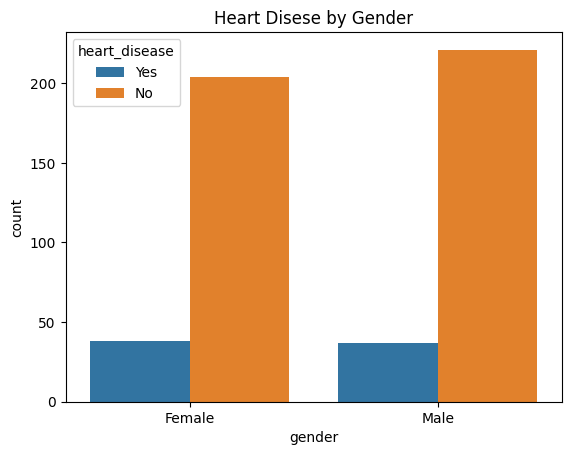

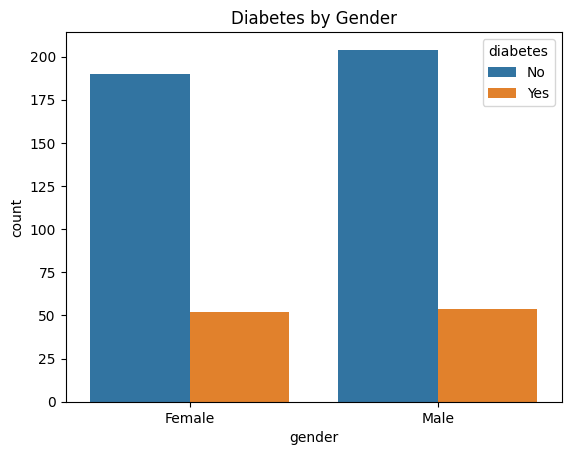

In [13]:
sns.countplot(x='gender', hue='heart_disease', data=df)
plt.title("Heart Disese by Gender")
plt.show()

sns.countplot(x='gender', hue='diabetes', data=df)
plt.title("Diabetes by Gender")
plt.show()

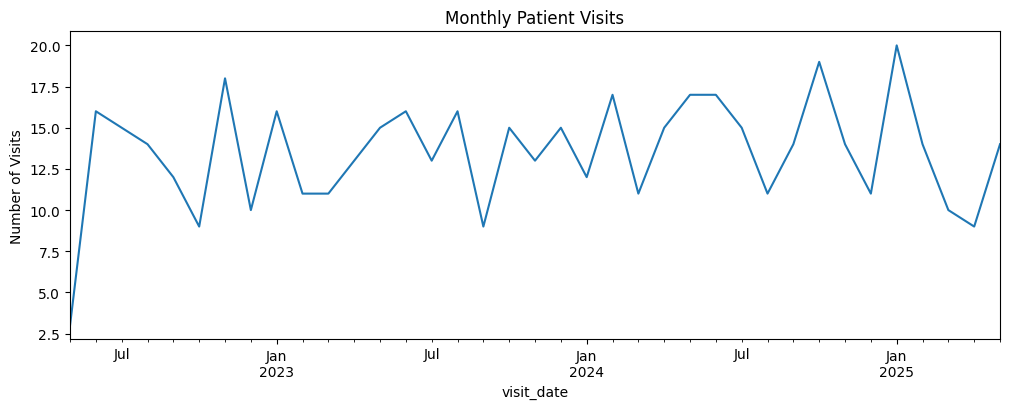

In [15]:
monthly_counts = df.groupby(df['visit_date'].dt.to_period('M')).size()
monthly_counts.plot(kind='line', figsize=(12,4), title='Monthly Patient Visits')
plt.ylabel("Number of Visits")
plt.show()

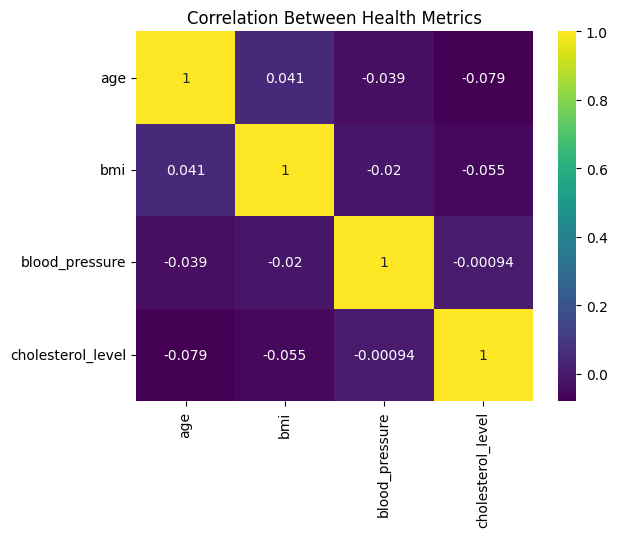

In [18]:
corr = df[['age', 'bmi', 'blood_pressure', 'cholesterol_level']].corr()
sns.heatmap(corr, annot=True, cmap='viridis')   #'Blues', or 'magma' or coolwarm(this are used for the color schemes for the corr box design)
plt.title("Correlation Between Health Metrics")
plt.show()